In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plots

plots.style.use('fivethirtyeight')

from collections import Counter

birthdays=np.arange(1,366,1)

def birthday_sim(n,nrep):
    '''Estimate birthday matching probabilities using nrep simulations'''
    outcomes = np.array([])
    for i in np.arange(nrep):
        outcomes = np.append(outcomes, 
                             Counter(np.random.choice(birthdays,n)).most_common(1)[0][1])
    return outcomes

# Mathematical derivation versus computational estimation

We illustrated in the previous sections how to approach a simple problem using either mathematics or simulations (a computational solution).
There are many examples of scientitfic problems where advances have been made using either  computational or mathematical solutions or both. For example, in meteorology (**expand here**):
- Mathematical models of precipitation levels
- Simulations of local weather patterns

The debate of the merits of these two approaches is beyond the scope of this textbook (but it can lead to a stimulating classroom discussion), but we would like to note that there are problems where analytical derivations are preferred and problems where computational solutions are optimal. For example, when calculating the probability of winning a lottery where the number of combinations is very large (for example, hundreds of millions), a mathematical derivation works better because the estimation of very rare events require an enormous number of repetitions. Below we show a generalization of the birthday problem where the code is almost identical to what we introduced above, while a mathematical derivation is a lot more difficult.

## The triplets problem

Given a number of people, $n$, what is the probability that at least three share a birthday? Assumptions are the same as before:

a. 365 days in a year.

b. All days are equally likely.

c. Subjects have independent birthdays.

The exact formula for this probability is a lot more complicated than the one for the classical birthday problem (see reference below). Recall that we solved the birthday problem by focusing on the complement of the event of interest. The complement in the context of the triplets problem is as complicated as the event itself.

The next cell constructs a data frame with the estimated probabilities for $n$ ranging from 40 to 120; the range was selected to illustrate how probabilities are different than in the previous section.

Note that the only difference in the code is when we count the number of repetitions where the most frequent birthday count is larger or equal to 3.

In [2]:
nrep=1000
number_people=np.arange(40,121,1)
probs3= np.array([])
for i in number_people: probs3= np.append(probs3,sum(birthday_sim(i,nrep)>=3)/nrep)

Birthday3_df=pd.DataFrame(
    {"Number of people":number_people,
     "Triplet Probability":probs3})

Birthday3_df.tail(5)

,Number of people,Triplet Probability
76,116,0.789
77,117,0.797
78,118,0.807
79,119,0.844
80,120,0.824


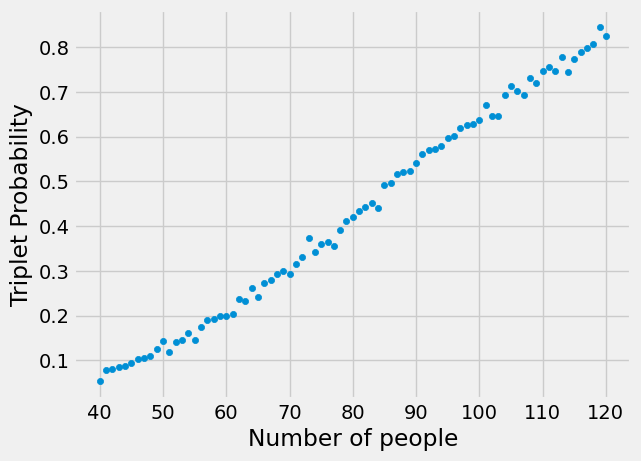

In [3]:
Birthday3_df.plot.scatter("Number of people","Triplet Probability");

If you want to obtain a smoother curve (reflecting a more accurate estimation of probabilities) you need to increase the number of simulations. Play with the code and see how the number of simulations affects the smoothness of the function!

Note that for triplets, the number of people that yields a probability closest to 0.5 is 87.

In [4]:
n=87
nrep=10000
sum(birthday_sim(n,nrep)>=3)/nrep

0.4915

Reference for the triplets problem:

DasGupta A (2005) The matching, birthday and the strong birthday problem: a contemporary review. Journal of Statistical Planning and Inference, Volume 130, Issues 1–2, 377-389.